In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## One condition HDDM 
#### Load data and check data head
##### Use anxious.csv

In [14]:
# Load data from csv file into a NumPy structured array
data1CControl = hddm.load_csv('./rt_dataframes/control.csv')
data1CControl.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [15]:
data1CControl = data1CControl.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data1CControl['rt'] = data1CControl['rt']/1000
data1CControl.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


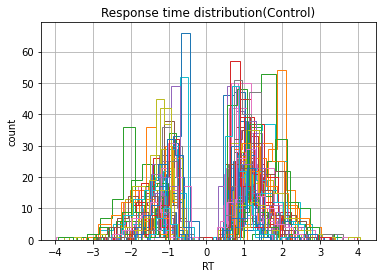

In [17]:
#flip the error RTs to be negative
data1CControl = hddm.utils.flip_errors(data1CControl)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Control)')
for i, subj_data in data1CControl.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C(seperate)/rt_distribution(Control).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [18]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data1CControl, include=('v', 'z', 'a', 't'))
m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM1C(seperate)/traces(1CCon).db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C(seperate)/model(1CCon)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 557.4 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std


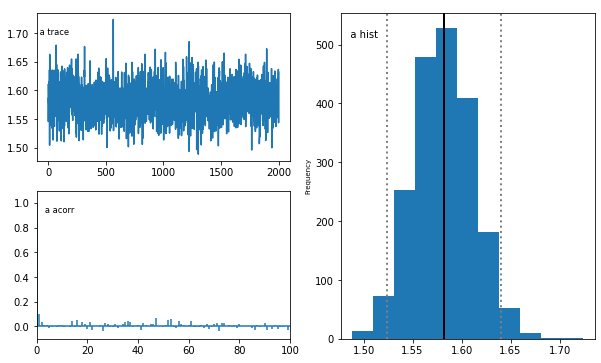

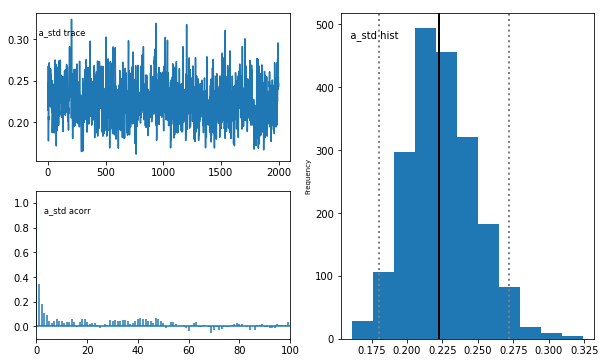

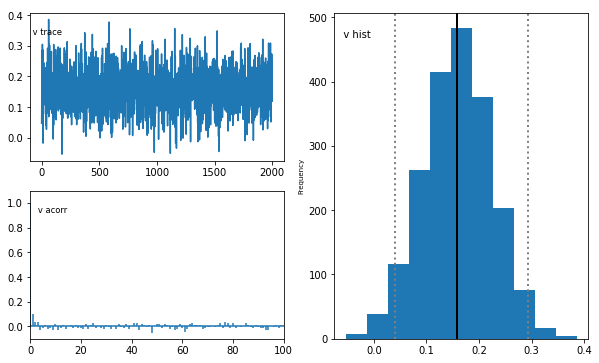

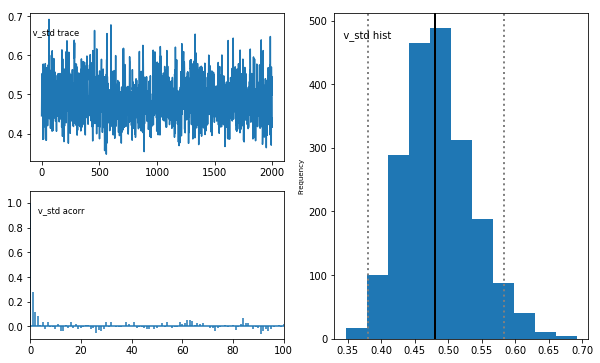

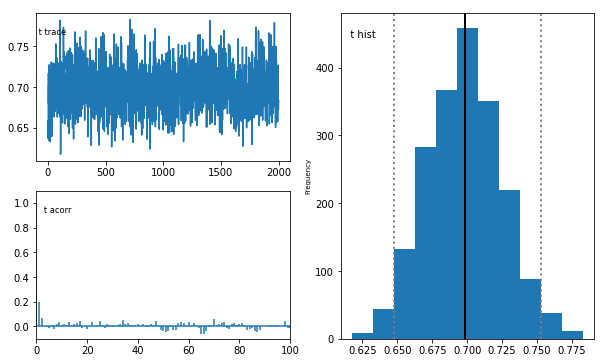

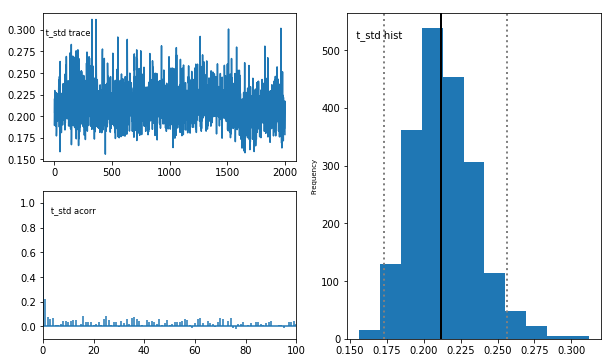

In [19]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','t_std'])

In [20]:
stats1CCon = m.gen_stats()
stats1CCon.to_csv('./fitting_results/HDDM/HDDM1C(seperate)/HDDM1CControl.csv', sep=',')
stats1CCon[stats1CCon.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.58189,0.0302478,1.52428,1.5614,1.58173,1.60277,1.64174,0.000843337
a_std,0.224786,0.0240264,0.181088,0.208332,0.222673,0.239644,0.274083,0.000923159
v,0.158514,0.0652647,0.0288937,0.115636,0.158816,0.202081,0.287612,0.0015735
v_std,0.484791,0.0521204,0.39164,0.448893,0.480639,0.517017,0.599194,0.00169903
t,0.698174,0.0268446,0.647082,0.679359,0.698279,0.71583,0.752693,0.000764724
t_std,0.213453,0.0218915,0.176407,0.198213,0.211652,0.22704,0.263365,0.000725769
z,0.545277,0.00830176,0.528877,0.539811,0.54523,0.550663,0.562258,0.000284186
z_std,0.219072,0.020288,0.181789,0.205115,0.218339,0.232708,0.261156,0.000840814


In [21]:
m.dic

17054.032034220556

## Check for Model convergence

In [22]:
# Set up models list to append results
models = list()

In [23]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM1C(seperate)/chain_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM1C(seperate)/chain1CCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [24]:
num_chains = 5
data_chains = [(data1CControl,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0
Fitting chain 1
Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 2967 of 3000 complete in 578.3 sec               0%                  ] 4 of 3000 complete in 0.6 sec  [                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec [                  0%                  ] 7 of 3000 complete in 1.2 sec [                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec  [                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.8 sec[        

In [25]:
models

In [26]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0002054812203387
a_std: 1.0007152123063134
a_subj.02535fcf7e16bb56: 1.0044355462324195
a_subj.09ba82a2ca814481: 1.0002076199127825
a_subj.0abfc32a4d12c731: 1.0005485707152786
a_subj.0b0a94c202d0b233: 0.9998304988328438
a_subj.0d894551bc966608: 1.0009149225719416
a_subj.15e0c065b2c11595: 1.0004722724266333
a_subj.163b12703c8e5c3c: 1.0002334225371319
a_subj.1bf86ff948486447: 1.0004104248974537
a_subj.1cb976bac3a2016b: 1.0003147074337673
a_subj.22d84796012679e8: 1.000166675551517
a_subj.247384e4eccc4f80: 1.0003324536325033
a_subj.27902f23b60a7b76: 0.9999270343353363
a_subj.296a71628065dfa8: 1.1079282746083974
a_subj.371fb6652968f25f: 1.0015680114983814
a_subj.3ddf191ed8c33c57: 0.9999269862033148
a_subj.414f1040212a659b: 1.0001715505571414
a_subj.46fd6e0b3b5c1df3: 1.0002486218390767
a_subj.4866612e834a9f5a: 1.0013467008770949
a_subj.4a43f99c56b2a634: 1.0012098234726863
a_subj.4e3de1ed1c0d6103: 1.0013054473584893
a_subj.5497867d4afb5993: 1.00008291830077
a_subj.582ab220066afebc: 1.0005

In [27]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'a_subj.296a71628065dfa8': 1.1079282746083974, 't_subj.296a71628065dfa8': 1.1477398884248156}

Values smaller than the threshold:
{}


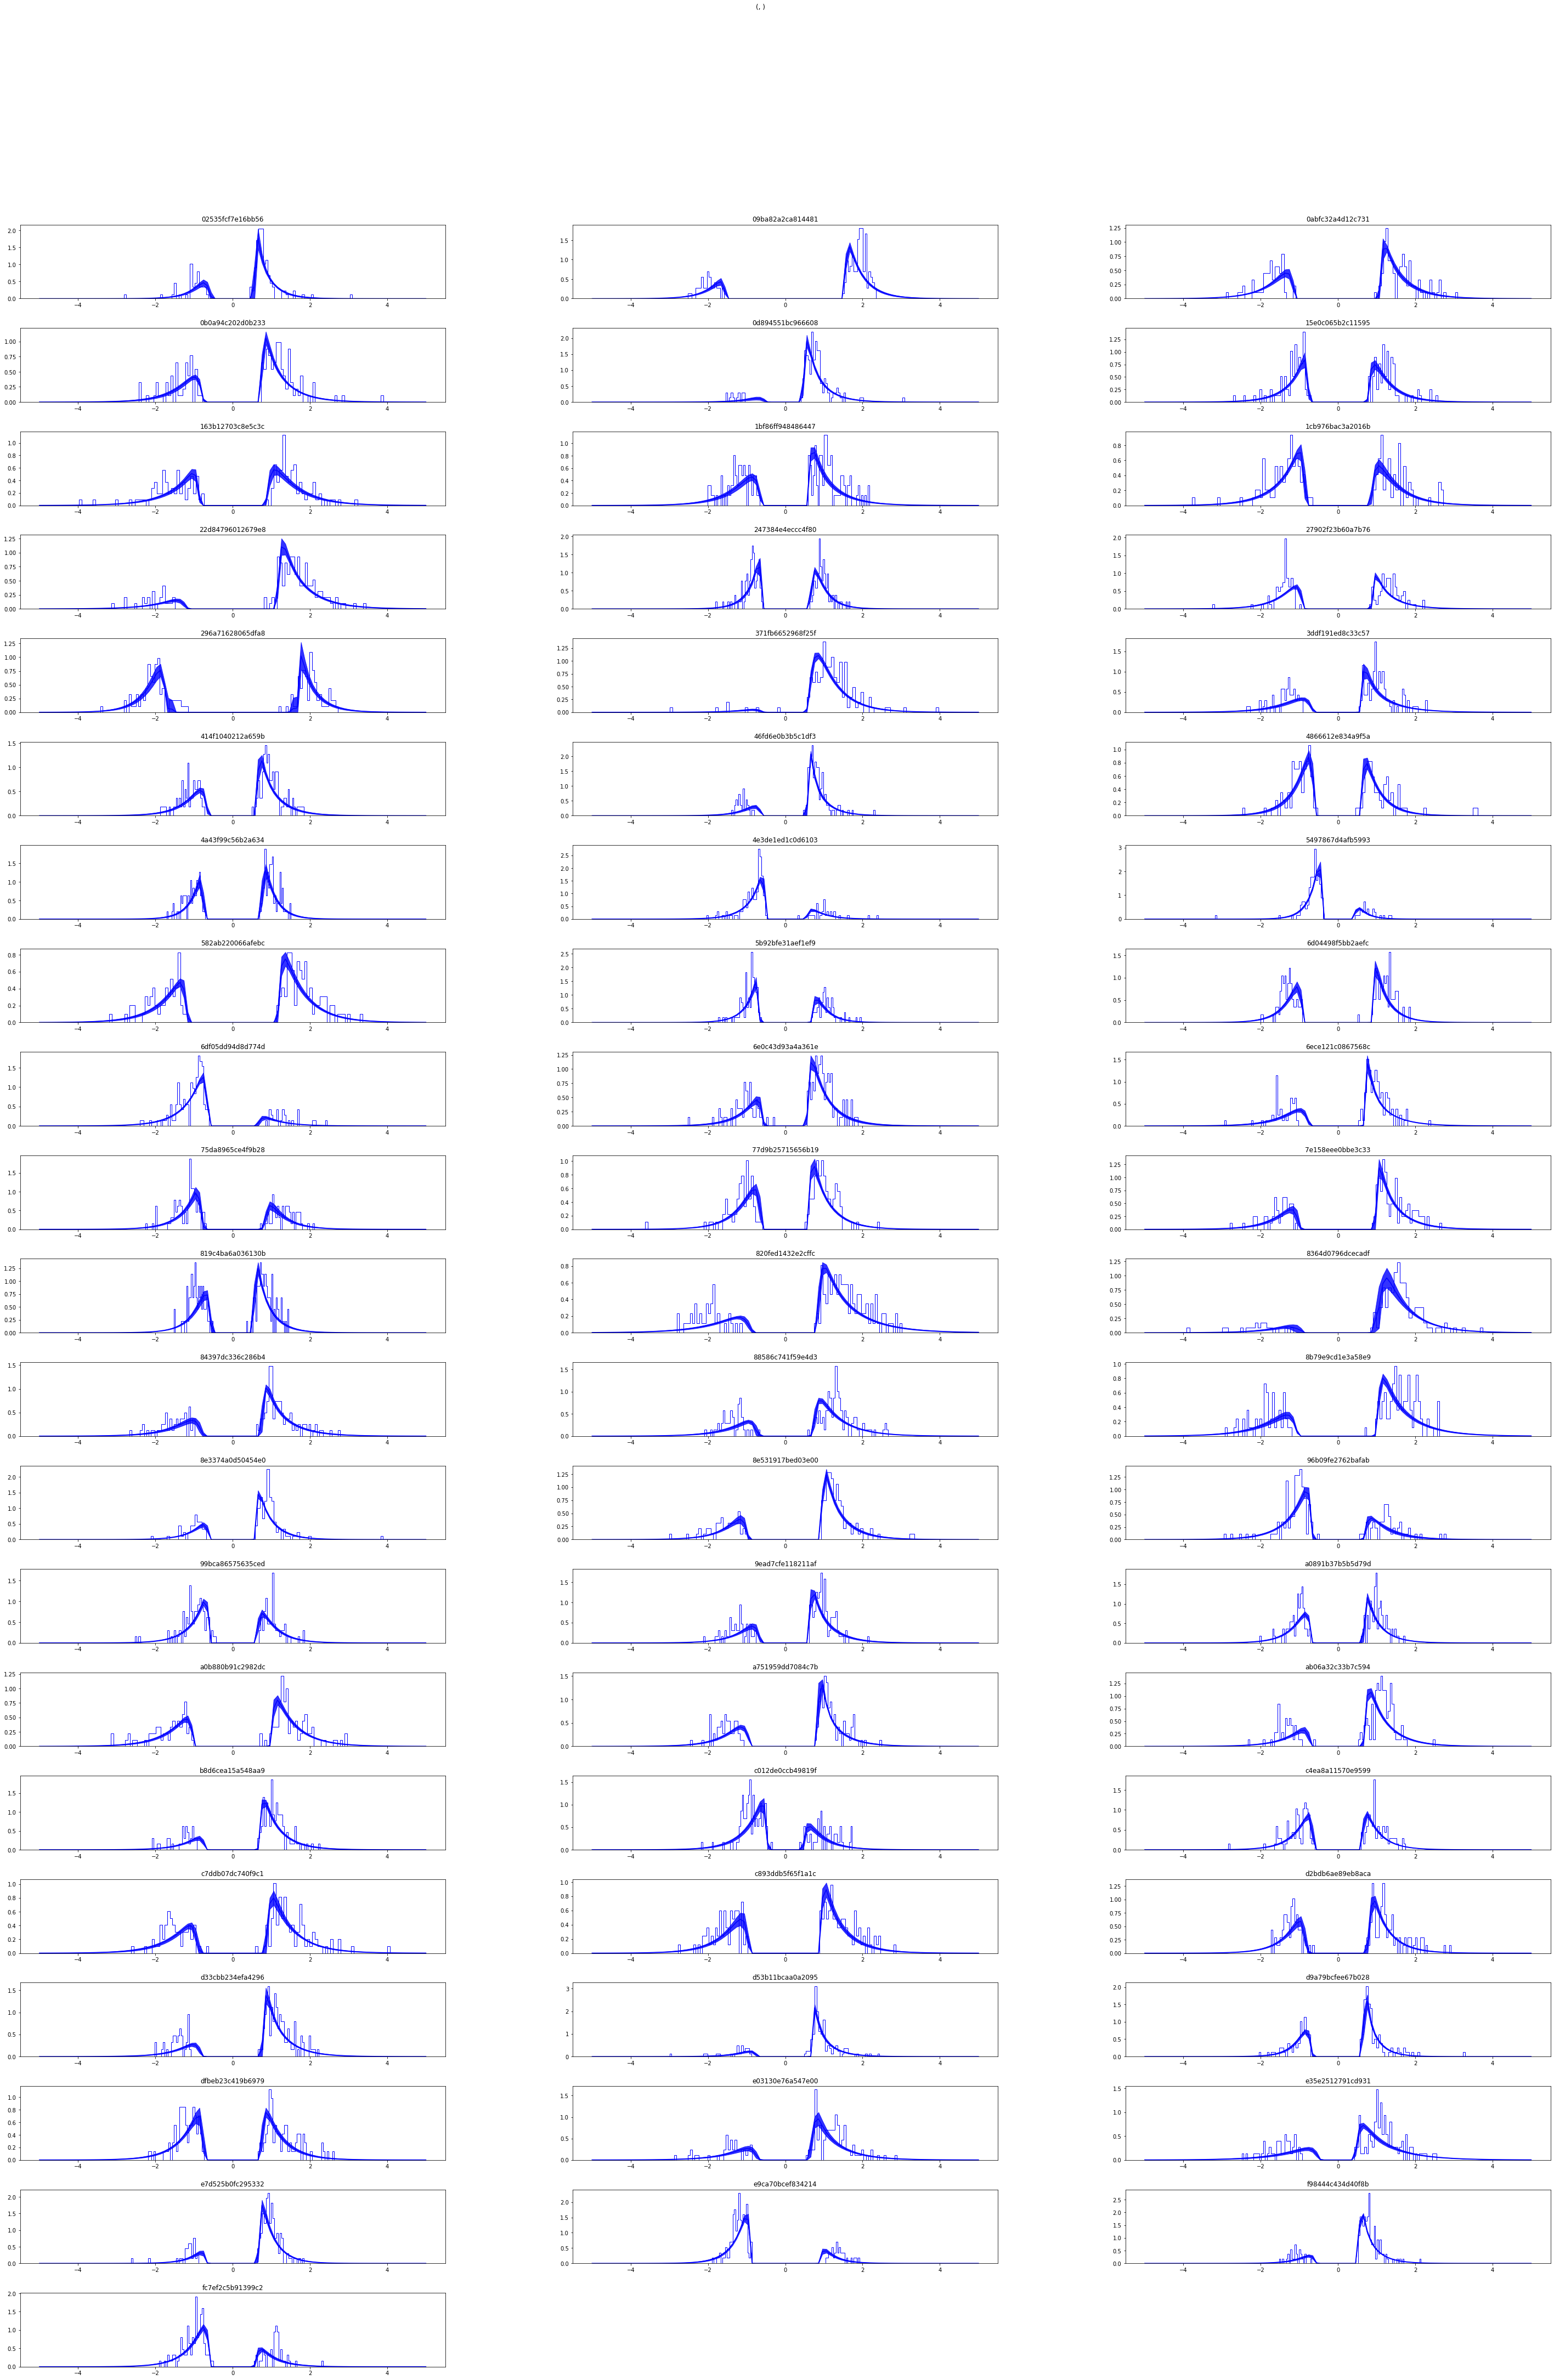

In [28]:
m.plot_posterior_predictive(figsize=(50, 70))